In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime, date
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import *
from sklearn.metrics import r2_score

2024-11-04 09:40:54.256303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 09:40:54.454835: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 09:40:54.514915: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-04 09:40:56.870453: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# read data
data = pd.read_csv('/home/hoangbaoan1901/Documents/information-system_UET/sem5/prdan/Homeworks/week-3-btl/datasets/jrfm-2156907-cleaned.csv')
data.head()

,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,Active Addr Cnt,Xfer Cnt,Mean Tx Size (native units),Total Fees (USD),...,RUB,Tweets,Google,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2015-08-07,278.740997,280.391998,276.365997,279.584991,42484800.0,283150,497302,2.057514,7235.134845,...,64.480003,47467,90.000000,0,0,0,0,1,0,0
1,2015-08-08,279.742004,279.928009,260.709991,260.997009,58533000.0,266587,284532,3.675623,5806.842316,...,64.480003,29031,91.578947,0,0,0,0,0,1,0
2,2015-08-09,261.115997,267.002991,260.467987,265.083008,23789600.0,262571,276720,4.201519,4952.554125,...,64.480003,27132,91.578947,0,0,0,0,0,0,1
3,2015-08-10,265.477997,267.032013,262.596008,264.470001,20979400.0,292834,304538,3.463212,7563.840456,...,64.480003,27744,96.315789,1,0,0,0,0,0,0
4,2015-08-11,264.342010,270.385986,264.093994,270.385986,25433900.0,271613,280398,3.785274,7128.842169,...,62.889999,26653,104.210526,0,1,0,0,0,0,0


In [3]:
data.shape

(2430, 48)

In [4]:
data["Date"] = pd.to_datetime(data["Date"])

In [5]:
# Split data into 2 periods
start_day_p1 = pd.Timestamp(2015, 8, 7)
test_day_p1 = pd.Timestamp(2018, 4, 1)
end_day_p1 = pd.Timestamp(2018, 9, 30)

period1 = data[(data["Date"] >= start_day_p1) & (data["Date"] <= end_day_p1) ].reset_index(drop = True)
train_dataset_p1 = period1[period1["Date"] < test_day_p1].reset_index(drop = True)
test_dataset_p1 = period1[period1["Date"] >= test_day_p1].reset_index(drop = True)


start_day_p2 = pd.Timestamp(2018, 10, 1)
test_day_p2 = pd.Timestamp(2021, 10, 1)
end_day_p2 = pd.Timestamp(2022, 4, 1)

period2 = data[(data["Date"] >= start_day_p2) & (data["Date"] <= end_day_p2) ].reset_index(drop = True)
train_dataset_p2 = period2[period2["Date"] < test_day_p2].reset_index(drop = True)
test_dataset_p2 = period2[period2["Date"] >= test_day_p2].reset_index(drop = True)

train_dataset_p1 = train_dataset_p1.drop("Date", axis=1)
test_dataset_p1 = test_dataset_p1.drop("Date", axis=1)
train_dataset_p2 = train_dataset_p2.drop("Date", axis=1)
test_dataset_p2 = test_dataset_p2.drop("Date", axis=1)


print(period1.shape, period2.shape)

(1151, 48) (1279, 48)


In [6]:
# Metrics
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score

def directional_accuracy(y_true, y_pred):
	y_test_da = np.array(y_true)
	y_pred_0 = y_pred[1:] - y_test_da[:-1]
	y_test_0 = y_true[1:] - y_test_da[:-1]
	DA = (y_pred_0<0) == (y_test_0<0)
	return np.mean(DA)*100
# Scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor


def create_data_RF(train_dataset, test_dataset):
	X_train = train_dataset[:-1]
	Y_train = train_dataset["BTC_Close"][1:]
	X_test = test_dataset[:-1]
	Y_test = test_dataset["BTC_Close"][1:]
	return X_train, Y_train, X_test, Y_test


def train_model_RF(X_train, Y_train, X_test):
	rfr = RandomForestRegressor(max_depth=10, n_estimators=500)
	rfr.fit(X_train, Y_train)
	pred_y = rfr.predict(X_test)
	return pred_y

# LSTM
def create_data_LSTM(train_dataset, test_dataset, scaled=True, time_step=1):
	def create_sequences(data, target, time_step):
		X, y = [], []
		for i in range(len(data) - time_step):
			X.append(data[i:(i + time_step)])
			y.append(target[i + time_step])
		return np.array(X), np.array(y)

	X_train = train_dataset
	Y_train = train_dataset["BTC_Close"]
	X_test = test_dataset
	Y_test = test_dataset["BTC_Close"]
	X_train, Y_train = create_sequences(X_train, Y_train, time_step=time_step)
	X_test, Y_test = create_sequences(X_test, Y_test, time_step=time_step)
	if (scaled == True):
		scaler = MinMaxScaler()
		X_train_scaled = scaler.fit_transform(
			X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
		X_test_scaled = scaler.transform(
			X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
		X_train = X_train_scaled
		X_test = X_test_scaled

	return X_train, Y_train, X_test, Y_test

from tensorflow.keras.callbacks import EarlyStopping # type: ignore
def train_model_lstm(X_train, Y_train, X_test, epochs=250):
	input_layer = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
	x = tf.keras.layers.LSTM(128, activation='relu', return_sequences=True)(input_layer)
	x = tf.keras.layers.Dropout(0.2)(x)
	x = tf.keras.layers.LSTM(128, activation='relu', return_sequences=True)(x)
	x = tf.keras.layers.Dropout(0.3)(x)
	x = tf.keras.layers.LSTM(256, activation='relu', return_sequences=True)(x)
	x = tf.keras.layers.Dropout(0.4)(x)
	x = tf.keras.layers.LSTM(256, activation='relu', return_sequences=False)(x)
	x = tf.keras.layers.Dropout(0.5)(x)
	output_layer = tf.keras.layers.Dense(1)(x)
	model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
	model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
	early_stopping = EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
	history = model.fit(X_train, Y_train, epochs=epochs)
	prediction = model.predict(X_test)
	return prediction

In [8]:
# Create data
## Random Forest
X_train_RF_p1, Y_train_RF_p1, X_test_RF_p1, Y_test_RF_p1 = create_data_RF(train_dataset_p1, test_dataset_p1)
## LSTM
X_train_LSTM_l1_p1, Y_train_LSTM_l1_p1, X_test_LSTM_l1_p1, Y_test_LSTM_l1_p1 = create_data_LSTM(train_dataset_p1, test_dataset_p1, True, 1)
X_train_LSTM_l3_p1, Y_train_LSTM_l3_p1, X_test_LSTM_l3_p1, Y_test_LSTM_l3_p1 = create_data_LSTM(train_dataset_p1, test_dataset_p1, True, 3)
X_train_LSTM_l7_p1, Y_train_LSTM_l7_p1, X_test_LSTM_l7_p1, Y_test_LSTM_l7_p1 = create_data_LSTM(train_dataset_p1, test_dataset_p1, True, 7)
X_train_LSTM_l14_p1, Y_train_LSTM_l14_p1, X_test_LSTM_l14_p1, Y_test_LSTM_l14_p1 = create_data_LSTM(train_dataset_p1, test_dataset_p1, True, 14)

## Random Forest
X_train_RF_p2, Y_train_RF_p2, X_test_RF_p2, Y_test_RF_p2 = create_data_RF(train_dataset_p2, test_dataset_p2)
## LSTM
X_train_LSTM_l1_p2, Y_train_LSTM_l1_p2, X_test_LSTM_l1_p2, Y_test_LSTM_l1_p2 = create_data_LSTM(train_dataset_p2, test_dataset_p2, True, 1)
X_train_LSTM_l3_p2, Y_train_LSTM_l3_p2, X_test_LSTM_l3_p2, Y_test_LSTM_l3_p2 = create_data_LSTM(train_dataset_p2, test_dataset_p2, True, 3)
X_train_LSTM_l7_p2, Y_train_LSTM_l7_p2, X_test_LSTM_l7_p2, Y_test_LSTM_l7_p2 = create_data_LSTM(train_dataset_p2, test_dataset_p2, True, 7)
X_train_LSTM_l14_p2, Y_train_LSTM_l14_p2, X_test_LSTM_l14_p2, Y_test_LSTM_l14_p2 = create_data_LSTM(train_dataset_p2, test_dataset_p2, True, 14)

In [ ]:
RF_p1_results = []
LSTM_l1_p1_results = []
LSTM_l3_p1_results = []
LSTM_l7_p1_results = []
LSTM_l14_p1_results = []
RF_p2_results = []
LSTM_l1_p2_results = []
LSTM_l3_p2_results = []
LSTM_l7_p2_results = []
LSTM_l14_p2_results = []

for i in range(3):
	rf_p1_result = train_model_RF(X_train_RF_p1, Y_train_RF_p1, X_test_RF_p1)
	lstm_l1_p1_result = train_model_lstm(X_train_LSTM_l1_p1, Y_train_LSTM_l1_p1, X_test_LSTM_l1_p1)
	lstm_l3_p1_result = train_model_lstm(X_train_LSTM_l3_p1, Y_train_LSTM_l3_p1, X_test_LSTM_l3_p1)
	lstm_l7_p1_result = train_model_lstm(X_train_LSTM_l7_p1, Y_train_LSTM_l7_p1, X_test_LSTM_l7_p1)
	lstm_l14_p1_result = train_model_lstm(X_train_LSTM_l14_p1, Y_train_LSTM_l14_p1, X_test_LSTM_l14_p1)
	rf_p2_result = train_model_RF(X_train_RF_p2, Y_train_RF_p2, X_test_RF_p2)
	lstm_l1_p2_result = train_model_lstm(X_train_LSTM_l1_p2, Y_train_LSTM_l1_p2, X_test_LSTM_l1_p2, epochs=70)
	lstm_l3_p2_result = train_model_lstm(X_train_LSTM_l3_p2, Y_train_LSTM_l3_p2, X_test_LSTM_l3_p2, epochs=70)
	lstm_l7_p2_result = train_model_lstm(X_train_LSTM_l7_p2, Y_train_LSTM_l7_p2, X_test_LSTM_l7_p2, epochs=70)
	lstm_l14_p2_result = train_model_lstm(X_train_LSTM_l14_p2, Y_train_LSTM_l14_p2, X_test_LSTM_l14_p2, epochs=70)

	RF_p1_results.append(rf_p1_result)
	LSTM_l1_p1_results.append(lstm_l1_p1_result)
	LSTM_l3_p1_results.append(lstm_l3_p1_result)
	LSTM_l7_p1_results.append(lstm_l7_p1_result)
	LSTM_l14_p1_results.append(lstm_l14_p1_result)

	RF_p2_results.append(rf_p2_result)
	LSTM_l1_p2_results.append(lstm_l1_p2_result)
	LSTM_l3_p2_results.append(lstm_l3_p2_result)
	LSTM_l7_p2_results.append(lstm_l7_p2_result)
	LSTM_l14_p2_results.append(lstm_l14_p2_result)
	

I0000 00:00:1730688076.269035    4909 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730688076.684311    4909 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730688076.684960    4909 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730688076.694514    4909 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/250


I0000 00:00:1730688084.417784    5096 service.cc:146] XLA service 0x13256e10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730688084.417827    5096 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2024-11-04 09:41:24.627015: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-04 09:41:25.707247: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


26/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23205516.0000 - mae: 2786.5188 - mse: 23207878.0000

I0000 00:00:1730688090.397550    5096 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 179ms/step - loss: 23225356.0000 - mae: 2781.4900 - mse: 23225356.0000
Epoch 2/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20089534.0000 - mae: 2524.1448 - mse: 20089534.0000
Epoch 3/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3991668.5000 - mae: 1584.7826 - mse: 3991668.5000
Epoch 4/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1284991.7500 - mae: 701.0806 - mse: 1284991.7500
Epoch 5/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1036724.7500 - mae: 532.0280 - mse: 1036724.7500
Epoch 6/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1018540.0625 - mae: 520.3954 - mse: 1018540.0625
Epoch 7/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 917880.1250 - mae: 510.8190 - mse: 917880.1250
Epoch 8/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1056281.3750 - mae: 505.3154 - mse: 1056281.3750
Epoch 9/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1238293.5000 - mae: 563.0564 - mse: 1238293.5000
Epoch 10/250
31/31 ━━━━━━━━━━━━━

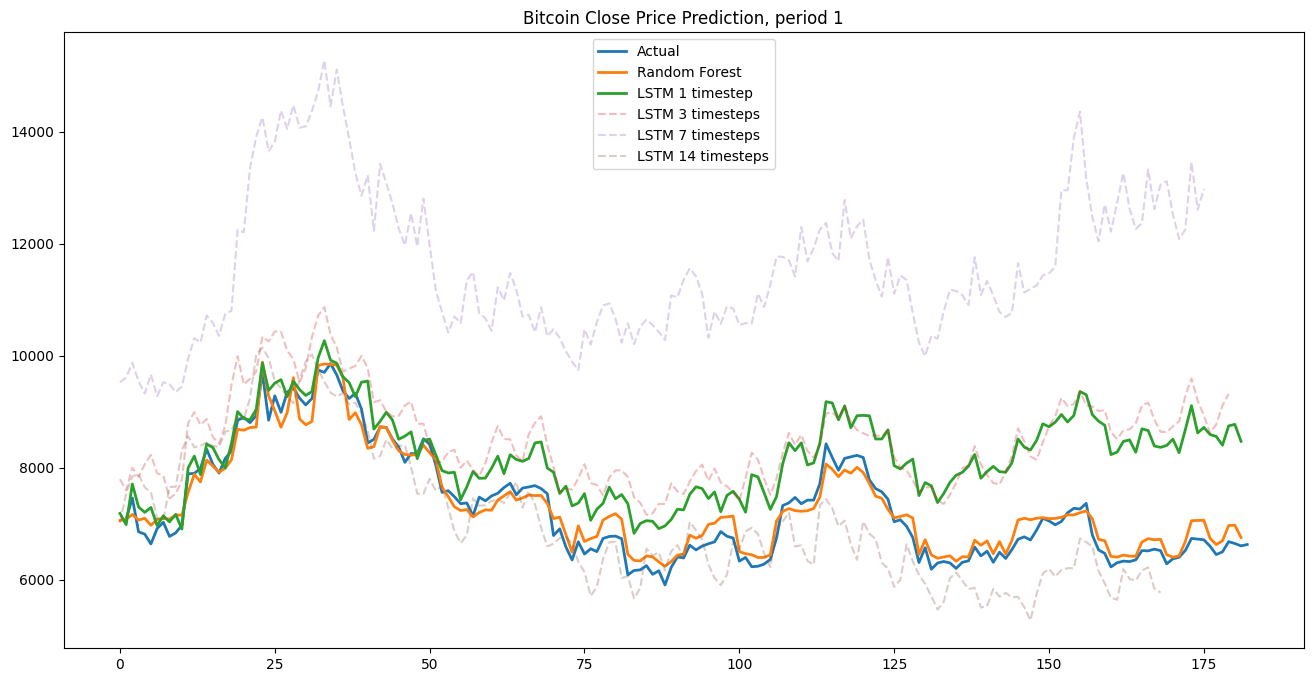

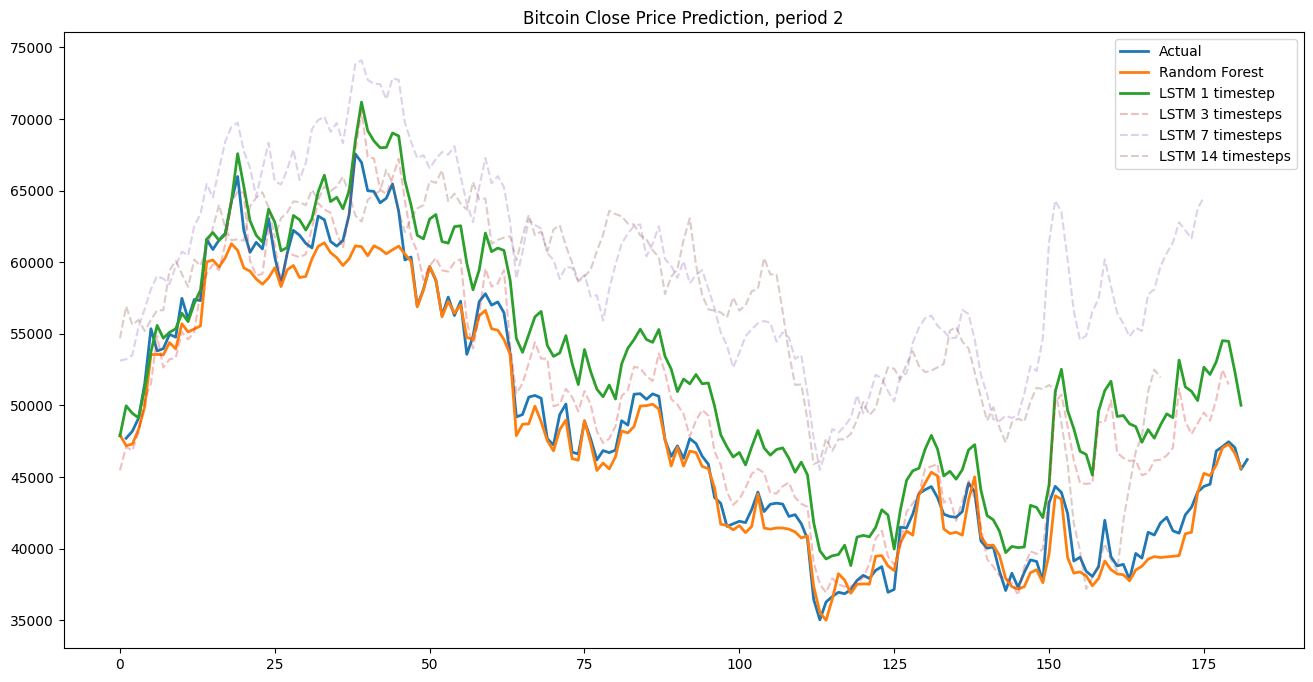

==================================================RMSE==================================================
RMSE RF p1:  318.5000634622566
RMSE LSTM 1 timestep p1:  1176.3553491439247
RMSE LSTM 3 timesteps p1:  1404.825936218595
RMSE LSTM 7 timesteps p1:  4494.055977539126
RMSE LSTM 14 timesteps p1:  887.9910398512083
RMSE RF p2:  2159.87705889612
RMSE LSTM 1 timestep p2:  5163.069333334343
RMSE LSTM 3 timesteps p2:  4343.091982032066
RMSE LSTM 7 timesteps p2:  12545.09296304324
RMSE LSTM 14 timesteps p2:  11660.211810312787
==================================================MAPE==================================================
MAPE RF p1:  0.033335990194808755
MAPE LSTM 1 timestep p1:  0.1432644518466155
MAPE LSTM 3 timesteps p1:  0.18027871565692088
MAPE LSTM 7 timesteps p1:  0.606461748835212
MAPE LSTM 14 timesteps p1:  0.10278141746745022
MAPE RF p2:  0.03390636989982929
MAPE LSTM 1 timestep p2:  0.09645776547761287
MAPE LSTM 3 timesteps p2:  0.07582033364775223
MAPE LSTM 7 timesteps 

In [15]:
# Plot
plt.figure(figsize=(16, 8))
plt.title('Bitcoin Close Price Prediction, period 1')
plt.plot(Y_test_RF_p1, label='Actual', linewidth=2)
plt.plot(RF_p1_results[0], label='Random Forest', linewidth=2)
plt.plot(LSTM_l1_p1_results[0], label='LSTM 1 timestep', linewidth=2)
plt.plot(LSTM_l3_p1_results[0], label='LSTM 3 timesteps', alpha=0.3, linestyle = '--')
plt.plot(LSTM_l7_p1_results[0], label='LSTM 7 timesteps', alpha=0.3, linestyle = '--')
plt.plot(LSTM_l14_p1_results[0], label='LSTM 14 timesteps', alpha=0.3, linestyle = '--')
plt.legend()
plt.show()

plt.figure(figsize=(16, 8))
plt.title('Bitcoin Close Price Prediction, period 2')
plt.plot(Y_test_RF_p2, label='Actual', linewidth=2)
plt.plot(RF_p2_results[0], label='Random Forest', linewidth=2)
plt.plot(LSTM_l1_p2_results[0], label='LSTM 1 timestep', linewidth=2)
plt.plot(LSTM_l3_p2_results[0], label='LSTM 3 timesteps', alpha=0.3, linestyle = '--')
plt.plot(LSTM_l7_p2_results[0], label='LSTM 7 timesteps', alpha=0.3, linestyle = '--')
plt.plot(LSTM_l14_p2_results[0], label='LSTM 14 timesteps', alpha=0.3, linestyle = '--')
plt.legend()
plt.show()


# RMSE
print("="*50 + "RMSE" + "="*50)
print("RMSE RF p1: ", root_mean_squared_error(Y_test_RF_p1, RF_p1_results[0]))
print("RMSE LSTM 1 timestep p1: ", root_mean_squared_error(Y_test_LSTM_l1_p1, LSTM_l1_p1_results[0]))
print("RMSE LSTM 3 timesteps p1: ", root_mean_squared_error(Y_test_LSTM_l3_p1, LSTM_l3_p1_results[0]))
print("RMSE LSTM 7 timesteps p1: ", root_mean_squared_error(Y_test_LSTM_l7_p1, LSTM_l7_p1_results[0]))
print("RMSE LSTM 14 timesteps p1: ", root_mean_squared_error(Y_test_LSTM_l14_p1, LSTM_l14_p1_results[0]))

print("RMSE RF p2: ", root_mean_squared_error(Y_test_RF_p2, RF_p2_results[0]))
print("RMSE LSTM 1 timestep p2: ", root_mean_squared_error(Y_test_LSTM_l1_p2, LSTM_l1_p2_results[0]))
print("RMSE LSTM 3 timesteps p2: ", root_mean_squared_error(Y_test_LSTM_l3_p2, LSTM_l3_p2_results[0]))
print("RMSE LSTM 7 timesteps p2: ", root_mean_squared_error(Y_test_LSTM_l7_p2, LSTM_l7_p2_results[0]))
print("RMSE LSTM 14 timesteps p2: ", root_mean_squared_error(Y_test_LSTM_l14_p2, LSTM_l14_p2_results[0]))

# MAPE
print("="*50 + "MAPE" + "="*50)
print("MAPE RF p1: ", mean_absolute_percentage_error(Y_test_RF_p1, RF_p1_results[0]))
print("MAPE LSTM 1 timestep p1: ", mean_absolute_percentage_error(Y_test_LSTM_l1_p1, LSTM_l1_p1_results[0]))
print("MAPE LSTM 3 timesteps p1: ", mean_absolute_percentage_error(Y_test_LSTM_l3_p1, LSTM_l3_p1_results[0]))
print("MAPE LSTM 7 timesteps p1: ", mean_absolute_percentage_error(Y_test_LSTM_l7_p1, LSTM_l7_p1_results[0]))
print("MAPE LSTM 14 timesteps p1: ", mean_absolute_percentage_error(Y_test_LSTM_l14_p1, LSTM_l14_p1_results[0]))

print("MAPE RF p2: ", mean_absolute_percentage_error(Y_test_RF_p2, RF_p2_results[0]))
print("MAPE LSTM 1 timestep p2: ", mean_absolute_percentage_error(Y_test_LSTM_l1_p2, LSTM_l1_p2_results[0]))
print("MAPE LSTM 3 timesteps p2: ", mean_absolute_percentage_error(Y_test_LSTM_l3_p2, LSTM_l3_p2_results[0]))
print("MAPE LSTM 7 timesteps p2: ", mean_absolute_percentage_error(Y_test_LSTM_l7_p2, LSTM_l7_p2_results[0]))
print("MAPE LSTM 14 timesteps p2: ", mean_absolute_percentage_error(Y_test_LSTM_l14_p2, LSTM_l14_p2_results[0]))


# DA
print("="*50 + "DA" + "="*50)
print("DA RF p1: ", directional_accuracy(Y_test_RF_p1, RF_p1_results[0]))
print("DA LSTM 1 timestep p1: ", directional_accuracy(Y_test_LSTM_l1_p1, LSTM_l1_p1_results[0]))
print("DA LSTM 3 timesteps p1: ", directional_accuracy(Y_test_LSTM_l3_p1, LSTM_l3_p1_results[0]))
print("DA LSTM 7 timesteps p1: ", directional_accuracy(Y_test_LSTM_l7_p1, LSTM_l7_p1_results[0]))
print("DA LSTM 14 timesteps p1: ", directional_accuracy(Y_test_LSTM_l14_p1, LSTM_l14_p1_results[0]))

print("DA RF p2: ", directional_accuracy(Y_test_RF_p2, RF_p2_results[0]))
print("DA LSTM 1 timestep p2: ", directional_accuracy(Y_test_LSTM_l1_p2, LSTM_l1_p2_results[0]))
print("DA LSTM 3 timesteps p2: ", directional_accuracy(Y_test_LSTM_l3_p2, LSTM_l3_p2_results[0]))
print("DA LSTM 7 timesteps p2: ", directional_accuracy(Y_test_LSTM_l7_p2, LSTM_l7_p2_results[0]))
print("DA LSTM 14 timesteps p2: ", directional_accuracy(Y_test_LSTM_l14_p2, LSTM_l14_p2_results[0]))
